4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


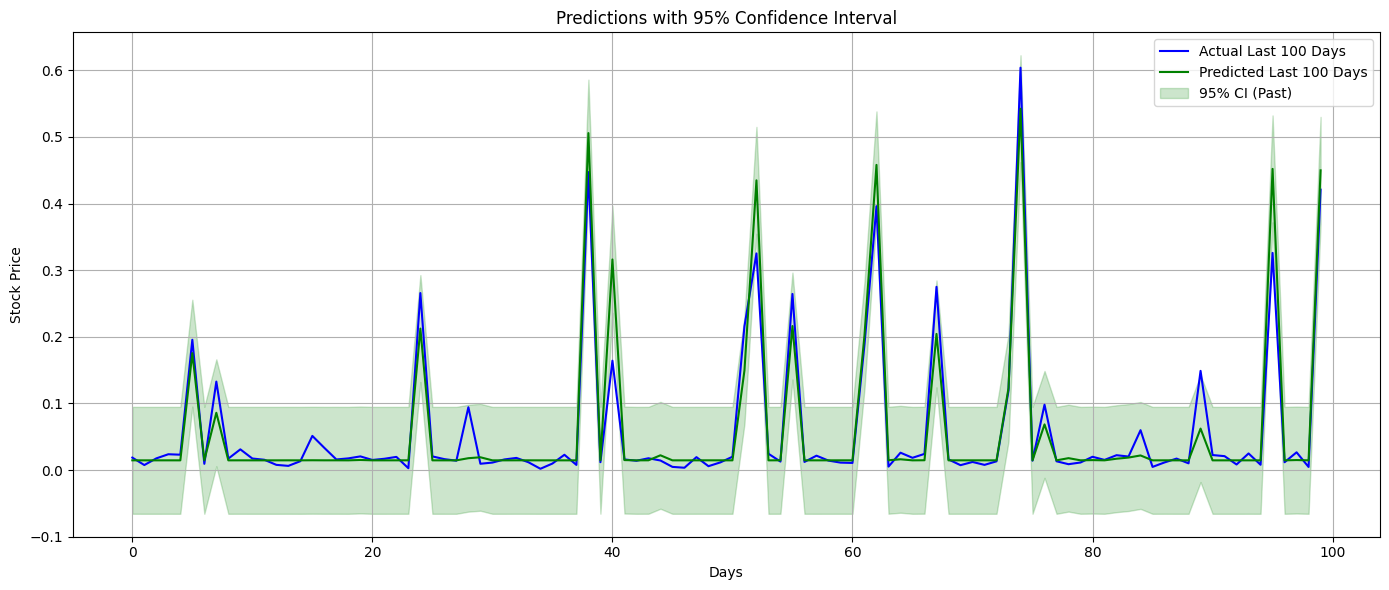

Mean Absolute Error (MAE): 0.0162
Root Mean Squared Error (RMSE): 0.0317
R² Score (Accuracy): 0.9172


In [11]:
#Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

last_100_X = X_test[-100:]
last_100_y_true = y_test[-100:]
last_100_y_pred = model.predict(last_100_X).flatten()

val_pred = model.predict(X_test).flatten()
val_residuals = y_test - val_pred
residual_std = np.std(val_residuals)

ci = 1.96 * residual_std
upper_bound_last100 = last_100_y_pred + ci
lower_bound_last100 = last_100_y_pred - ci

plt.figure(figsize=(14, 6))

plt.plot(range(100), last_100_y_true, label='Actual Last 100 Days', color='blue')
plt.plot(range(100), last_100_y_pred, label='Predicted Last 100 Days', color='green')


plt.fill_between(range(100), lower_bound_last100, upper_bound_last100, color='green', alpha=0.2, label='95% CI (Past)')

plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Predictions with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(last_100_y_true, last_100_y_pred)
rmse = np.sqrt(mean_squared_error(last_100_y_true, last_100_y_pred))
r2 = r2_score(last_100_y_true, last_100_y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score (Accuracy): {r2:.4f}")


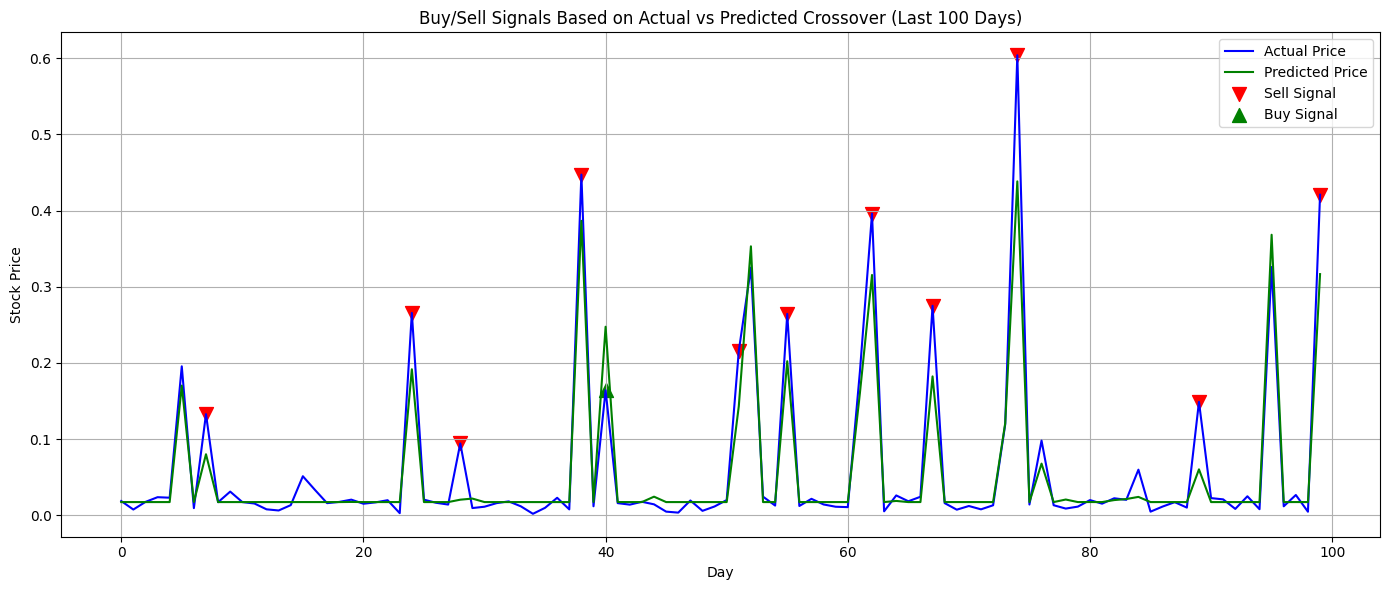

In [ ]:
images = images / np.max(images)
images = images[..., np.newaxis]
labels = labels / np.max(labels)
label_scaler = np.max(labels)

last_100_y_pred = last_100_y_pred * label_scaler
last_100_y_true = last_100_y_true * label_scaler
threshold = 0.05 * label_scaler
signals = ['Hold']

for i in range(1, len(last_100_y_pred)):
    prev_diff = last_100_y_pred[i-1] - last_100_y_true[i-1]
    curr_diff = last_100_y_pred[i] - last_100_y_true[i]

    if curr_diff > threshold and prev_diff <= threshold:
        signals.append('Buy')
    elif curr_diff < -threshold and prev_diff >= -threshold:
        signals.append('Sell')
    else:
        signals.append('Hold')

plt.figure(figsize=(14,6))
plt.plot(range(100), last_100_y_true, label='Actual Price', color='blue')
plt.plot(range(100), last_100_y_pred, label='Predicted Price', color='green')

for i, signal in enumerate(signals):
    if signal == 'Buy':
        plt.scatter(i, last_100_y_true[i], color='green', marker='^', s=100, label='Buy Signal' if i == signals.index('Buy') else "")
    elif signal == 'Sell':
        plt.scatter(i, last_100_y_true[i], color='red', marker='v', s=100, label='Sell Signal' if i == signals.index('Sell') else "")

plt.title("Buy/Sell Signals Based on Actual vs Predicted Crossover (Last 100 Days)")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()